In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import itertools
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix

In [3]:
# Loading the dataset
df = pd.read_csv('./fake_news.csv')

In [4]:
# Getting information about the dataset to explore
df.shape

(6335, 4)

In [5]:
df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [6]:
df.tail()

,Unnamed: 0,title,text,label
6330,4490,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL
6331,8062,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE
6332,8622,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,FAKE
6333,4021,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL
6334,4330,Jeb Bush Is Suddenly Attacking Trump. Here's W...,Jeb Bush Is Suddenly Attacking Trump. Here's W...,REAL


In [7]:
# Check for NULL values
df.isnull()

,Unnamed: 0,title,text,label
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
6330,False,False,False,False
6331,False,False,False,False
6332,False,False,False,False
6333,False,False,False,False


In [8]:
df.isnull().sum()

,0
Unnamed: 0,0
title,0
text,0
label,0


NULL значений нет, это хорошо

In [9]:
# Graph the dataset
df.label

,label
0,FAKE
1,FAKE
2,REAL
3,FAKE
4,REAL
...,...
6330,REAL
6331,FAKE
6332,FAKE
6333,REAL


In [10]:
df.label.value_counts()

,count
label,
REAL,3171
FAKE,3164


In [11]:
i = df.label.value_counts()

In [12]:
fig = go.Figure(data=[go.Bar(
    x=['Real', 'Fake'], y = i,
    text = i,
    textposition = 'auto'
)])

fig.show()

In [13]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df['text'], df.label, test_size = 0.2, random_state = 7)

In [14]:
X_train

,text
6237,The head of a leading survivalist group has ma...
3722,‹ › Arnaldo Rodgers is a trained and educated ...
5774,"Patty Sanchez, 51, used to eat 13,000 calories..."
336,But Benjamin Netanyahu’s reelection was regard...
3622,John Kasich was killing it with these Iowa vot...
...,...
5699,
2550,It’s not that Americans won’t elect wealthy pr...
537,Anyone writing sentences like ‘nevertheless fu...
1220,More Catholics are in Congress than ever befor...


In [15]:
X_train.shape

(5068,)

In [16]:
y_train

,label
6237,FAKE
3722,FAKE
5774,FAKE
336,REAL
3622,REAL
...,...
5699,FAKE
2550,REAL
537,REAL
1220,REAL


In [17]:
y_train.shape

(5068,)

In [18]:
X_test

,text
3534,A day after the candidates squared off in a fi...
6265,VIDEO : FBI SOURCES SAY INDICTMENT LIKELY FOR ...
3123,"It's debate season, where social media has bro..."
3940,Mitch McConnell has decided to wager the Repub...
2856,"Donald Trump, the actual Republican candidate ..."
...,...
4986,Washington (CNN) President Barack Obama announ...
5789,The revival of middle-class jobs has been one ...
4338,"""I can guarantee that,"" Obama answered when as..."
5924,Videos 30 Civilians Die In US Airstrike Called...


In [19]:
X_test.shape

(1267,)

In [20]:
y_test

,label
3534,REAL
6265,FAKE
3123,REAL
3940,REAL
2856,REAL
...,...
4986,REAL
5789,REAL
4338,REAL
5924,FAKE


In [21]:
y_test.shape

(1267,)

In [22]:
# Initialize TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words = 'english', max_df = 0.7)

In [24]:
# Fit and transform training and testing data
tfidf_train = tfidf_vectorizer.fit_transform(X_train)
tfidf_test = tfidf_vectorizer.transform(X_test)

In [25]:
# Initialize PassiveAggressiveClassifier
pac = PassiveAggressiveClassifier(max_iter = 50)
pac.fit(tfidf_train, y_train)

PassiveAggressiveClassifier(max_iter=50)

In [26]:
# Predict based on test data
y_pred = pac.predict(tfidf_test)

In [27]:
# Calculate the accuracy
score = accuracy_score(y_test, y_pred)
print(f'Accuracy: {round(score * 100)}%')

Accuracy: 93%


In [28]:
# Build confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=['FAKE','REAL'])

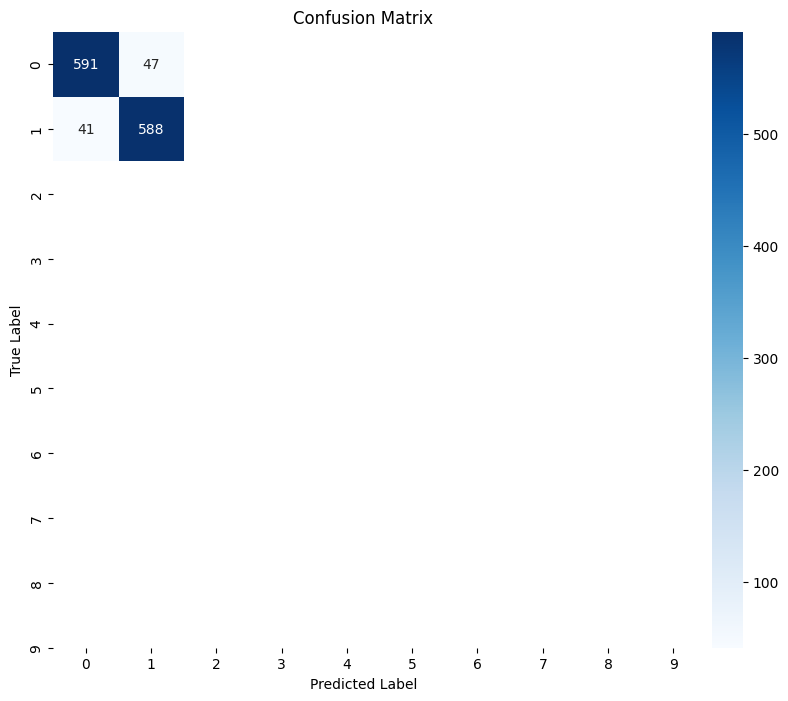

In [29]:
# Visualization of confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [31]:
# Creating a classification report
report = classification_report(y_test,y_pred, output_dict=True)
print('\n clasification report:\n',report)


 clasification report:
 {'FAKE': {'precision': 0.935126582278481, 'recall': 0.9263322884012539, 'f1-score': 0.9307086614173228, 'support': 638.0}, 'REAL': {'precision': 0.925984251968504, 'recall': 0.9348171701112877, 'f1-score': 0.930379746835443, 'support': 629.0}, 'accuracy': 0.930544593528019, 'macro avg': {'precision': 0.9305554171234924, 'recall': 0.9305747292562708, 'f1-score': 0.930544204126383, 'support': 1267.0}, 'weighted avg': {'precision': 0.9305878879099131, 'recall': 0.930544593528019, 'f1-score': 0.930545372331291, 'support': 1267.0}}


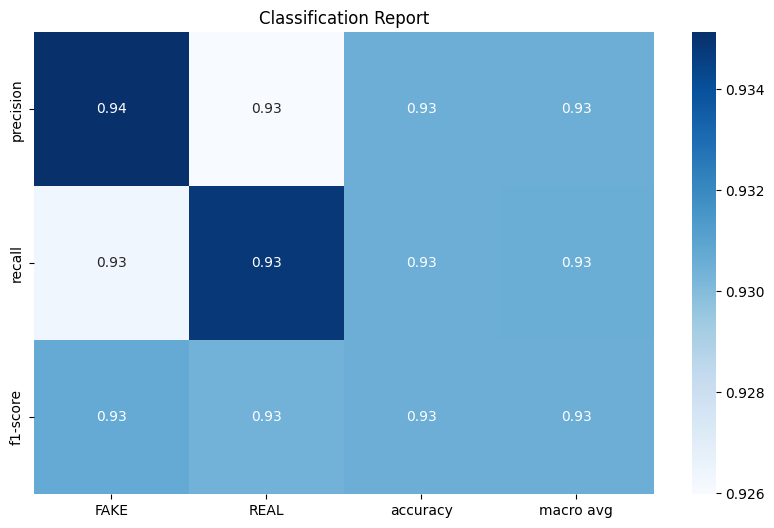

In [32]:
# Visualization a classification report
report_df = pd.DataFrame(report).transpose()
plt.figure(figsize=(10, 6))
sns.heatmap(report_df.iloc[:-1, :-1].T, annot=True, cmap='Blues')
plt.title('Classification Report')
plt.show()

In [33]:
# Predict using new data
ii=['This is a really important question, Lambert says. “I don’t want to be passed along to two or three people,” she says. “I want one person to contact.” There may be specific contact points for different areas, she adds, such as the director of nursing for related questions. However, “I want to know that I can pop into the executive director’s office anytime, ask any question and make any kind of complaint,” she emphasizes. “I want to know that person is available. Because sometimes, you have to go up to that level.""']

In [34]:
ii = tfidf_vectorizer.transform(ii)

In [35]:
y_pred = pac.predict(ii)

In [36]:
y_pred

array(['REAL'], dtype='<U4')